In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# classifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\FOLASADE\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
df.shape

(20000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [6]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [7]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [8]:
df['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [9]:
df['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [10]:
df['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [11]:
df['product_class'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [12]:
df['product_size'].unique()

array(['medium', 'large', 'small', nan], dtype=object)

In [13]:
df['transaction_date'].nunique()

364

In [14]:
df['online_order'].nunique()

2

In [15]:
 df['transaction_id'].nunique()

20000

In [16]:
 df['customer_id'].nunique()

3494

In [17]:
df['TotalSales'] = df.groupby('customer_id')['list_price'].transform('sum')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TotalSales
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,1953.15
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,7351.70
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,8148.22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,7539.81
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,11292.54


In [18]:
df['distinct_cust'] = df['customer_id'].value_counts()
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TotalSales,distinct_cust
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,1953.15,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,7351.70,11.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,8148.22,3.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,7539.81,8.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,11292.54,2.0


In [19]:
df["order_status"].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [20]:
df.drop(df[df['order_status'] == 'Cancelled'].index, inplace=True)
df.shape

(19821, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19467 non-null  float64       
 5   order_status             19821 non-null  object        
 6   brand                    19625 non-null  object        
 7   product_line             19625 non-null  object        
 8   product_class            19625 non-null  object        
 9   product_size             19625 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19625 non-null  float64       
 12  product_first_sold_date  19625 n

In [22]:
 df['standard_cost'].nunique()

103

In [23]:
 df['list_price'].nunique()

295

In [24]:
 df['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [25]:
 df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [26]:
df[df["standard_cost"] > df["list_price"]]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TotalSales,distinct_cust


In [27]:
df = df[['customer_id', 'TotalSales']]
df.head()

,customer_id,TotalSales
0,2950,1953.15
1,3120,7351.70
2,402,8148.22
3,3135,7539.81
4,787,11292.54


In [28]:
df.shape

(19821, 2)

In [29]:
df.drop_duplicates(subset='customer_id', inplace=True)
df.shape

(3493, 2)

## Discoveries from the Transaction Data sheet
- Null values : online_order - 360, brand, product_line, product_size, standard_cost, product_first_sold_date  - 197
- product_first_sold_date - has invalid values and wrong data type

In [30]:
df1 = pd.read_excel(r"C:\Users\FOLASADE\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="NewCustomerList")
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.05,1.3125,1.640625,1.394531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.57,0.5700,0.712500,0.605625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.75,0.7500,0.750000,0.750000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.01,1.2625,1.262500,1.262500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.94,0.9400,1.175000,1.175000,4,4,1.703125


In [31]:
df1.shape

(1000, 23)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [33]:
df1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.744410,0.835680,0.940483,0.868023,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.201476,0.243648,0.295447,0.279669,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.700000,0.640625,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.830000,0.925000,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.910000,1.025000,1.137500,1.050000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [34]:
df1.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [35]:
df1['first_name'].nunique()

940

In [36]:
df1['last_name'].nunique()

961

In [37]:
df1['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [38]:
all_counts = df1["gender"].value_counts()
U_counts = all_counts["U"]
print(U_counts)

17


In [39]:
df1['job_title'].nunique()

184

In [40]:
 df1['DOB'].min()

Timestamp('1938-06-08 00:00:00')

In [41]:
 df1['DOB'].max()

Timestamp('2002-02-27 00:00:00')

In [42]:
df1['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', nan, 'Argiculture'],
      dtype=object)

In [43]:
df1['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [44]:
df1['deceased_indicator'].unique()

array(['N'], dtype=object)

In [45]:
df1['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df1['address'].nunique()

1000

In [47]:
df1['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [48]:
df1['country'].unique()

array(['Australia'], dtype=object)

In [49]:
df1['Rank'].nunique()

324

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

## Discoveries from the NewCustomerList Data sheet
- Null values: last_name- 29, DOB - 17, job_title - 106, job_industry_category - 165,
- 4 numerical columns are unnamed
- wrong data type : postcode, property valuation, past_3_years_bike_related_purchases

In [51]:
df2 = pd.read_excel(r"C:\Users\FOLASADE\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic")
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [52]:
df2.shape

(4000, 13)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [54]:
df2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [55]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [56]:
df['customer_id'].nunique()

3493

In [57]:
df2['first_name'].nunique()

3139

In [58]:
df2['last_name'].nunique()

3725

In [59]:
df2['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [60]:
all_count = df2["gender"].value_counts()
Femal = all_count["Femal"]
print(Femal)

1


In [61]:
all_count = df2["gender"].value_counts()
F = all_count["F"]
print(F)

1


In [62]:
all_count = df2["gender"].value_counts()
M = all_count["M"]
print(M)

1


In [63]:
all_count = df2["gender"].value_counts()
U = all_count["U"]
print(U)

88


In [64]:
df2['past_3_years_bike_related_purchases'].unique()

array([93, 81, 61, 33, 56, 35,  6, 31, 97, 49, 99, 58, 38, 85, 91, 57, 79,
       76, 72, 74, 43, 55, 12, 37,  5, 62, 18,  3, 17, 44, 59, 40, 46, 64,
       24, 63, 98, 51, 68, 22,  2, 48, 87, 26, 60, 47, 73, 21, 67, 16, 78,
       30, 94, 28, 20, 11,  1, 75, 41, 69, 19, 80, 83, 25, 54,  4, 23, 65,
       88, 10, 77,  9, 82, 27, 53, 32, 34, 71, 36, 90, 95,  8, 39,  7, 42,
       13, 45, 50, 14, 89, 84, 96, 70, 66,  0, 15, 86, 92, 29, 52],
      dtype=int64)

In [65]:
df2['DOB'].max()

Timestamp('2002-03-11 00:00:00')

In [66]:
df2['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [67]:
df2['job_title'].nunique()

195

In [68]:
df2['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [69]:
df2['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [70]:
df2['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [71]:
df2['default'].nunique()

90

In [72]:
df2['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
df2['tenure'].unique()

array([11., 16., 15.,  7.,  8., 13., 20.,  9.,  6.,  1., 18., 21., 12.,
       19., 14.,  4., 22.,  5., 17.,  2.,  3., 10., nan])

## Discoveries from the CustomerDemographic Data sheet
- Null values: last_name - 125, DOB - 87, job_title - 506, job_industry_category - 656, default - 302, tenure - 87
- default as incorrect values
- DOB has year of birth of 1843
- Gender has incorrect value of F -1, M- 1, Femal - 1


In [74]:
df3 = pd.read_excel(r"C:\Users\FOLASADE\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress")
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [75]:
df3.shape

(3999, 6)

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [77]:
df3.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [78]:
df3.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [79]:
df3['customer_id'].nunique()

3999

In [80]:
df3['address'].nunique()

3996

In [81]:
df3['postcode'].nunique()

873

In [82]:
df3['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [83]:
all = df3["state"].value_counts()
VIC = all["VIC"]
print(VIC)

939


In [84]:
all = df3["state"].value_counts()
new = all["New South Wales"]
print(new)

86


In [85]:
all = df3["state"].value_counts()
QLD = all["QLD"]
print(QLD)

838


In [86]:
all = df3["state"].value_counts()
NSW = all["NSW"]
print(NSW)

2054


In [87]:
all = df3["state"].value_counts()
vic = all["Victoria"]
print(vic)

82


In [88]:
df3['country'].unique()

array(['Australia'], dtype=object)

In [89]:
df3['property_valuation'].unique()

array([10,  9,  4, 12,  8,  6,  7,  3,  5, 11,  1,  2], dtype=int64)

## Discoveries from the CustomerAddress Data sheet
- Duplicate valuees =Victoria-82 and VIC 939, NSW- 2054 and New South Wales-86

In [90]:
df.shape

(3493, 2)

In [91]:
df2.shape

(4000, 13)

In [92]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [93]:
df2["deceased_indicator"].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [94]:
#df2.drop(df2['deceased_indicator'] == 'Y', inplace = True)
df2 = df2[df2['deceased_indicator'] != 'Y']
df2.shape

(3998, 13)

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3873 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3911 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3342 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   deceased_indicator                   3998 non-null   object        
 10  default     

In [96]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [97]:
df3.shape

(3999, 6)

In [98]:
df3.drop(['address', 'postcode'], axis=1, inplace=True)

In [99]:
df3.shape

(3999, 4)

In [100]:
new_df = pd.merge(df, df2, on='customer_id', how='inner')
new_df = pd.merge(new_df, df3, on='customer_id', how='inner')
new_df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,state,country,property_valuation
0,2950,1953.15,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,VIC,Australia,6
1,3120,7351.70,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,NSW,Australia,5
2,402,8148.22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0,NSW,Australia,1
3,3135,7539.81,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,â°â´âµâââ,No,16.0,NSW,Australia,10
4,787,11292.54,Norma,Batrim,Female,29,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0,NSW,Australia,7


In [101]:
new_df.shape

(3487, 17)

In [102]:
new_df.drop(['default', 'deceased_indicator'], axis=1, inplace=True)
new_df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation
0,2950,1953.15,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,Australia,6
1,3120,7351.70,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,Australia,5
2,402,8148.22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22.0,NSW,Australia,1
3,3135,7539.81,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16.0,NSW,Australia,10
4,787,11292.54,Norma,Batrim,Female,29,1996-12-15,NaN,Retail,Affluent Customer,Yes,2.0,NSW,Australia,7


In [103]:
new_df.shape

(3487, 15)

In [104]:
new_df["DOB"].max()

Timestamp('2002-03-11 00:00:00')

In [105]:
new_df["DOB"].min()

Timestamp('1843-12-21 00:00:00')

In [106]:
df_sorted = new_df.sort_values(by='DOB') 
df_sorted.head(10)

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation
900,34,13133.00,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,QLD,Australia,8
381,720,13004.35,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,No,6.0,NSW,Australia,10
2062,1092,4893.72,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,No,5.0,VIC,Australia,3
1000,3410,2965.89,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,No,16.0,NSW,Australia,10
1425,2413,8666.87,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,Yes,17.0,VIC,Australia,8
1705,658,5305.31,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,Yes,8.0,Victoria,Australia,9
12,1243,11625.08,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,No,8.0,NSW,Australia,11
2326,1565,3083.23,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,Yes,11.0,NSW,Australia,10
1450,1177,8367.47,Bobbette,Pozzi,Female,47,1953-08-31,Food Chemist,Health,Affluent Customer,Yes,6.0,NSW,Australia,8
2647,3471,4637.48,Brita,Afonso,Female,95,1953-09-05,Quality Engineer,IT,High Net Worth,Yes,8.0,NSW,Australia,7


In [107]:
def calculate_age_group(birth_date):
    birth_date = pd.Timestamp(birth_date)
    date_1991 = pd.Timestamp('1991-01-01')
    date_1976 = pd.Timestamp('1976-01-01')
    date_1961 = pd.Timestamp('1961-01-01') 
    
    if birth_date <= date_1991:
        return '32 and below'
    elif birth_date <= date_1976:
        return '33-47'
    elif birth_date <= date_1961:
        return '48-61'
    else:
        return '62 and above'
    
new_df['age_group'] = new_df['DOB'].apply(calculate_age_group)
new_df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,age_group
0,2950,1953.15,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,Australia,6,32 and below
1,3120,7351.70,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,Australia,5,32 and below
2,402,8148.22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22.0,NSW,Australia,1,32 and below
3,3135,7539.81,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16.0,NSW,Australia,10,32 and below
4,787,11292.54,Norma,Batrim,Female,29,1996-12-15,NaN,Retail,Affluent Customer,Yes,2.0,NSW,Australia,7,62 and above


In [108]:
new_df["DOB"].nunique()

3045

In [109]:
new_df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,age_group
0,2950,1953.15,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,Australia,6,32 and below
1,3120,7351.70,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,Australia,5,32 and below
2,402,8148.22,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22.0,NSW,Australia,1,32 and below
3,3135,7539.81,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16.0,NSW,Australia,10,32 and below
4,787,11292.54,Norma,Batrim,Female,29,1996-12-15,NaN,Retail,Affluent Customer,Yes,2.0,NSW,Australia,7,62 and above


In [110]:
new_df.shape

(3487, 16)

In [111]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3486
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3487 non-null   int64         
 1   TotalSales                           3487 non-null   float64       
 2   first_name                           3487 non-null   object        
 3   last_name                            3375 non-null   object        
 4   gender                               3487 non-null   object        
 5   past_3_years_bike_related_purchases  3487 non-null   int64         
 6   DOB                                  3411 non-null   datetime64[ns]
 7   job_title                            3066 non-null   object        
 8   job_industry_category                2927 non-null   object        
 9   wealth_segment                       3487 non-null   object        
 10  owns_car    

In [112]:
new_df.dropna(subset=['DOB'], inplace=True)
new_df.shape

(3411, 16)

In [113]:
df_sorted = new_df.sort_values(by='TotalSales', ascending=False)
new_list = df_sorted.head(1000)
new_list.to_excel('NewCustomerLists.xlsx', index=False)
print("sucess")

sucess


In [114]:
df = pd.read_excel(r"C:\Users\FOLASADE\Downloads\NewCustomerLists.xlsx")
df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,age_group
0,2183,19071.32,Jillie,Fyndon,Female,61,1972-02-07,Programmer Analyst IV,Manufacturing,Mass Customer,Yes,7,QLD,Australia,4,32 and below
1,1129,18349.27,Hercule,NaN,Male,2,1977-06-29,VP Marketing,Entertainment,Mass Customer,Yes,9,QLD,Australia,8,32 and below
2,1597,18052.68,Jeffry,Slowly,Male,93,1977-02-01,Nurse Practicioner,Retail,Affluent Customer,No,14,NSW,Australia,10,32 and below
3,941,17898.46,Tye,Doohan,Male,13,1995-02-02,Recruiting Manager,Financial Services,Affluent Customer,Yes,1,QLD,Australia,8,62 and above
4,2788,17258.94,Melantha,Pickburn,Female,45,1968-08-06,Social Worker,Health,Affluent Customer,No,4,VIC,Australia,10,32 and below


In [115]:
df = df.sort_values(by='TotalSales', ascending=False)

df['Rank'] = range(1, len(df) + 1)

df.reset_index(drop=True, inplace=True)

df.head()

,customer_id,TotalSales,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,age_group,Rank
0,2183,19071.32,Jillie,Fyndon,Female,61,1972-02-07,Programmer Analyst IV,Manufacturing,Mass Customer,Yes,7,QLD,Australia,4,32 and below,1
1,1129,18349.27,Hercule,NaN,Male,2,1977-06-29,VP Marketing,Entertainment,Mass Customer,Yes,9,QLD,Australia,8,32 and below,2
2,1597,18052.68,Jeffry,Slowly,Male,93,1977-02-01,Nurse Practicioner,Retail,Affluent Customer,No,14,NSW,Australia,10,32 and below,3
3,941,17898.46,Tye,Doohan,Male,13,1995-02-02,Recruiting Manager,Financial Services,Affluent Customer,Yes,1,QLD,Australia,8,62 and above,4
4,2788,17258.94,Melantha,Pickburn,Female,45,1968-08-06,Social Worker,Health,Affluent Customer,No,4,VIC,Australia,10,32 and below,5


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          1000 non-null   int64         
 1   TotalSales                           1000 non-null   float64       
 2   first_name                           1000 non-null   object        
 3   last_name                            972 non-null    object        
 4   gender                               1000 non-null   object        
 5   past_3_years_bike_related_purchases  1000 non-null   int64         
 6   DOB                                  1000 non-null   datetime64[ns]
 7   job_title                            888 non-null    object        
 8   job_industry_category                845 non-null    object        
 9   wealth_segment                       1000 non-null   object        
 10  owns_car     

In [117]:
df.shape

(1000, 17)

## Visualization

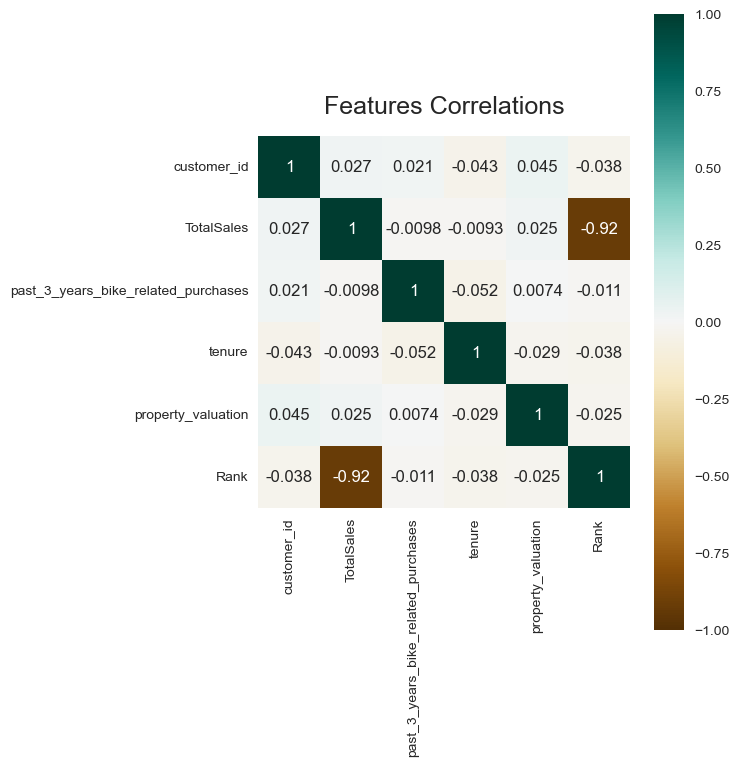

In [118]:
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlations', fontdict={'fontsize':18}, pad=16);

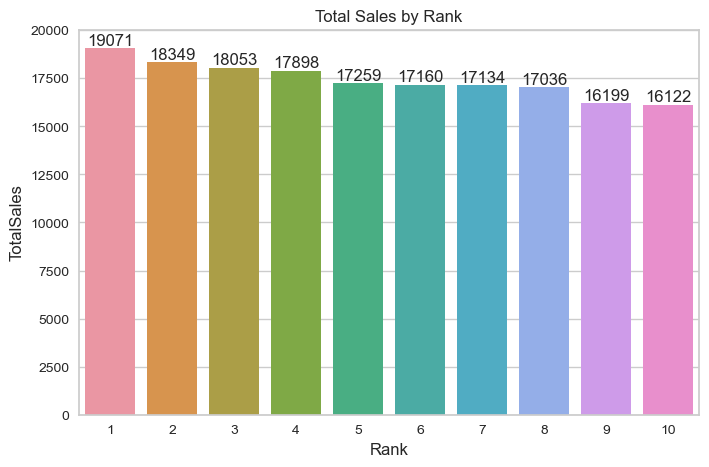

In [119]:
fig, axs=plt.subplots(figsize=(8,5))

sale= df.groupby("Rank")["TotalSales"].sum().reset_index()
sale = sale.nlargest(10, 'TotalSales')

sales= sns.barplot(x="Rank", data=sale, y="TotalSales", order= sale["Rank"])
sales.set_title("Total Sales by Rank")
for i, value in enumerate (sale["TotalSales"]):  
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()   

In [120]:
df.columns

Index(['customer_id', 'TotalSales', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'country', 'property_valuation', 'age_group', 'Rank'],
      dtype='object')

In [121]:
df["gender"].value_counts()

Female    499
Male      497
U           1
Femal       1
F           1
M           1
Name: gender, dtype: int64

In [122]:
df["wealth_segment"].value_counts()

Mass Customer        499
High Net Worth       253
Affluent Customer    248
Name: wealth_segment, dtype: int64

In [123]:
df["owns_car"].value_counts()

Yes    505
No     495
Name: owns_car, dtype: int64

In [124]:
df["state"].value_counts()

NSW                513
VIC                222
QLD                221
Victoria            22
New South Wales     22
Name: state, dtype: int64

In [125]:
df["property_valuation"].value_counts()

8     169
9     160
10    142
7     102
11     71
4      66
6      62
5      58
3      52
12     44
2      37
1      37
Name: property_valuation, dtype: int64

In [126]:
df.loc[df["gender"] == "Femal", "gender"] = "Female"

In [127]:
df.loc[df["gender"] == "F", "gender"] = "Female"

In [128]:
df.loc[df["gender"] == "M", "gender"] = "Male"

In [129]:
df['age_group'].unique()

array(['32 and below', '62 and above'], dtype=object)

<Axes: xlabel='age_group', ylabel='TotalSales'>

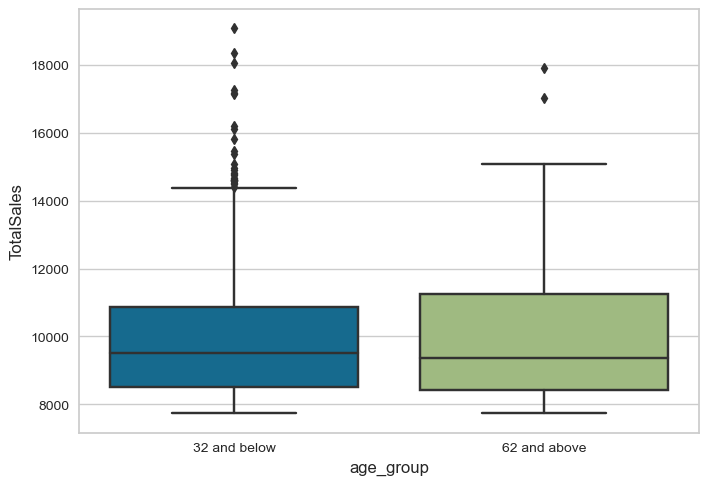

In [130]:
sns.boxplot(x='age_group', y='TotalSales', data=df)

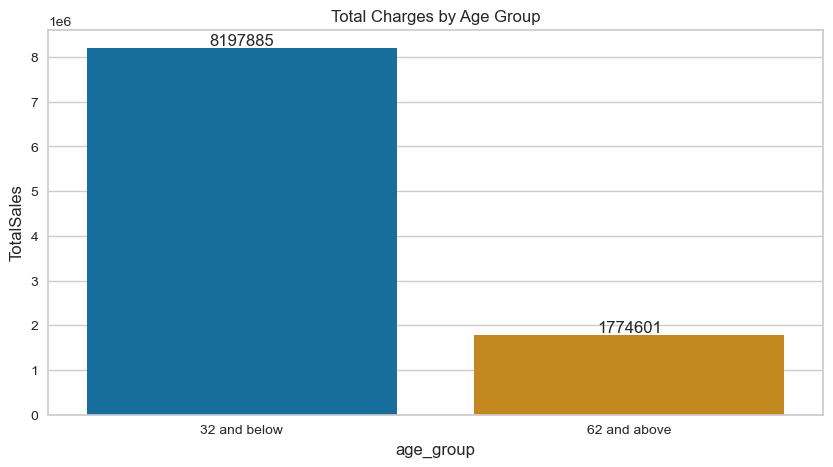

In [131]:
plt.figure(figsize=(10, 5))

age_charge = df.groupby("age_group")["TotalSales"].sum().reset_index()
values = df["age_group"].value_counts(ascending=False).values

# Sort the DataFrame in descending order based on the Charges column
age_charge = age_charge.sort_values(by="TotalSales", ascending=False)

age_chr = sns.barplot(x="age_group", data=age_charge, y="TotalSales", palette="colorblind", order=age_charge["age_group"])

for i, value in enumerate(age_charge['TotalSales']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

plt.title("Total Charges by Age Group")
plt.show()


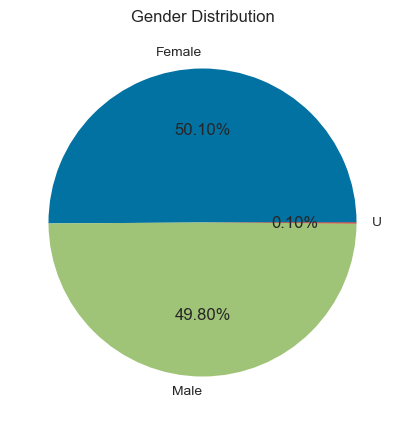

In [132]:
#df['gender'].value_counts().plot(kind='pie', title='Pie chart distribution of Gender',autopct='%1.0f%%')
fig, sales = plt.subplots(figsize = (5,5))
count = Counter(df["gender"])
sales.pie(count.values(), labels= count.keys(), autopct=lambda p:f'{p:.2f}%')
sales.set_title("Gender Distribution")
plt.show()

In [133]:
df["job_industry_category"].value_counts()

Financial Services    205
Manufacturing         195
Health                161
Retail                 97
Property               68
Entertainment          39
IT                     36
Argiculture            28
Telecommunications     16
Name: job_industry_category, dtype: int64

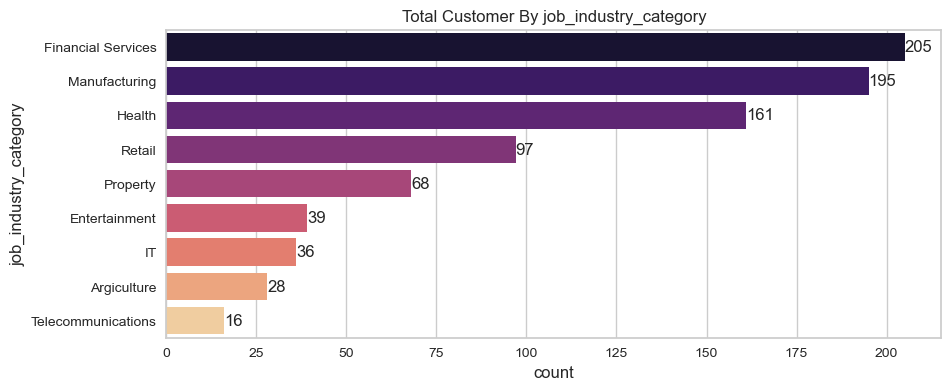

In [134]:
plt.figure(figsize = (10,4))
sales = sns.countplot(y=df["job_industry_category"], palette= "magma", order=df["job_industry_category"].value_counts(ascending = False).index)
values = df["job_industry_category"].value_counts(ascending = False).values
sales.bar_label(container = sales.containers[0], labels=values)
plt.title("Total Customer By job_industry_category")
plt.show()

In [135]:
df.loc[df["state"] == "Victoria", "state"] = "VIC"

In [136]:
df.loc[df["state"] == "New South Wales", "state"] = "NSW"

In [137]:
df["state"].value_counts()

NSW    535
VIC    244
QLD    221
Name: state, dtype: int64

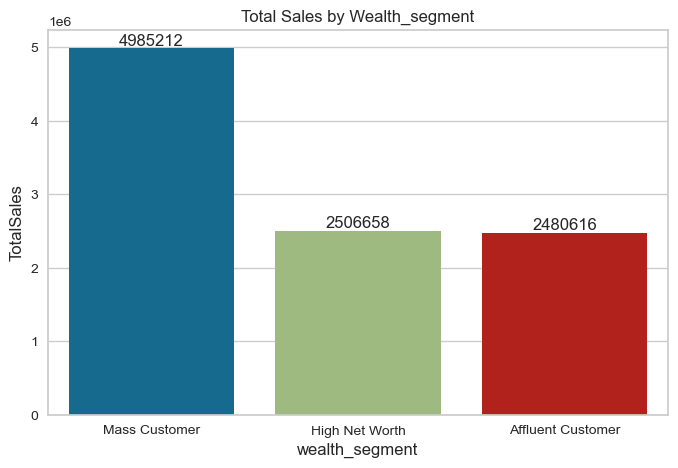

In [138]:
fig, axs=plt.subplots(figsize=(8,5))

sale= df.groupby("wealth_segment")["TotalSales"].sum().reset_index()
sale = sale.nlargest(10, 'TotalSales')
#sale= sale.sort_values(by="TotalSales",ascending=False)
sales= sns.barplot(x="wealth_segment", data=sale, y="TotalSales", order= sale["wealth_segment"])
sales.set_title("Total Sales by Wealth_segment")
for i, value in enumerate (sale["TotalSales"]):  
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()    

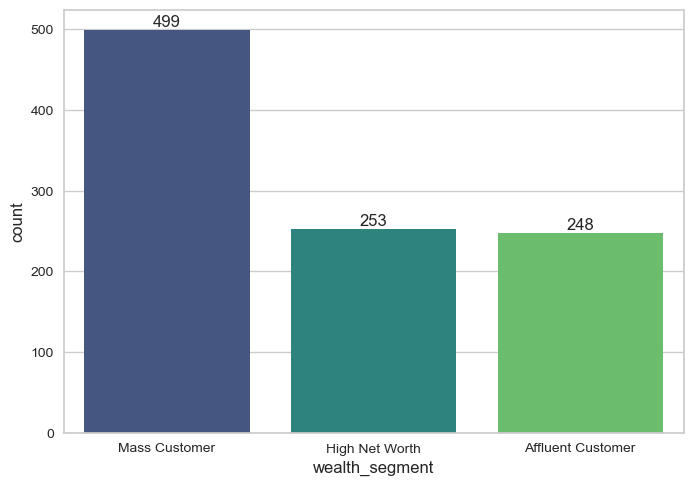

In [139]:
sales = sns.countplot(x=df["wealth_segment"], palette= "viridis", order=df["wealth_segment"].value_counts(ascending = False).index)
values = df["wealth_segment"].value_counts(ascending = False).values
sales.bar_label(container = sales.containers[0], labels=values);

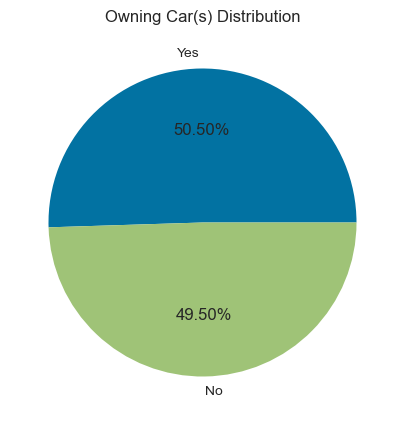

In [140]:
fig, sales = plt.subplots(figsize = (5,5))
count = Counter(df["owns_car"])
sales.pie(count.values(), labels= count.keys(), autopct=lambda p:f'{p:.2f}%')
sales.set_title("Owning Car(s) Distribution")
plt.show()

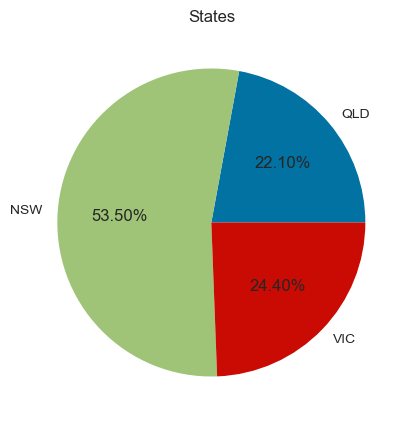

In [141]:
fig, sales = plt.subplots(figsize = (5,5))
count = Counter(df["state"])
sales.pie(count.values(), labels= count.keys(), autopct=lambda p:f'{p:.2f}%')
sales.set_title("States")
plt.show()

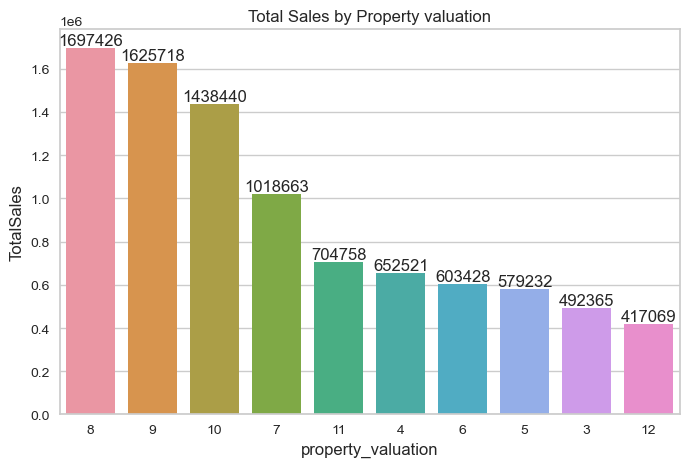

In [142]:
fig, axs=plt.subplots(figsize=(8,5))

sale= df.groupby("property_valuation")["TotalSales"].sum().reset_index()
sale = sale.nlargest(10, 'TotalSales')

sales= sns.barplot(x="property_valuation", data=sale, y="TotalSales", order= sale["property_valuation"])
sales.set_title("Total Sales by Property valuation")
for i, value in enumerate (sale["TotalSales"]):  
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()

In [143]:
df.dtypes

customer_id                                     int64
TotalSales                                    float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
owns_car                                       object
tenure                                          int64
state                                          object
country                                        object
property_valuation                              int64
age_group                                      object
Rank                                            int64
dtype: object

In [144]:
model_df = df[["TotalSales", "Rank", "wealth_segment"]]
model_df.head()

,TotalSales,Rank,wealth_segment
0,19071.32,1,Mass Customer
1,18349.27,2,Mass Customer
2,18052.68,3,Affluent Customer
3,17898.46,4,Affluent Customer
4,17258.94,5,Affluent Customer


In [145]:
encoder= LabelEncoder()
for c in model_df.columns[0:]:
    if(model_df[c].dtype=="object"):
        model_df[c]= encoder.fit_transform(model_df[c])
    else:
        model_df[c]=model_df[c]
model_df.head()

,TotalSales,Rank,wealth_segment
0,19071.32,1,2
1,18349.27,2,2
2,18052.68,3,0
3,17898.46,4,0
4,17258.94,5,0


In [146]:
model_df.dtypes

TotalSales        float64
Rank                int64
wealth_segment      int32
dtype: object

In [147]:
scaler=StandardScaler()
model_df = pd.DataFrame(scaler.fit_transform(model_df), columns=model_df.columns)
model_df.head()

,TotalSales,Rank,wealth_segment
0,4.795369,-1.730320,0.905637
1,4.414826,-1.726856,0.905637
2,4.258514,-1.723391,-1.512619
3,4.177235,-1.719927,-1.512619
4,3.840188,-1.716463,-1.512619


In [148]:
df5 = model_df
df5

,TotalSales,Rank,wealth_segment
0,4.795369,-1.730320,0.905637
1,4.414826,-1.726856,0.905637
2,4.258514,-1.723391,-1.512619
3,4.177235,-1.719927,-1.512619
4,3.840188,-1.716463,-1.512619
...,...,...,...
995,-1.178113,1.716463,0.905637
996,-1.178772,1.719927,-0.303491
997,-1.179362,1.723391,-0.303491
998,-1.182050,1.726856,0.905637


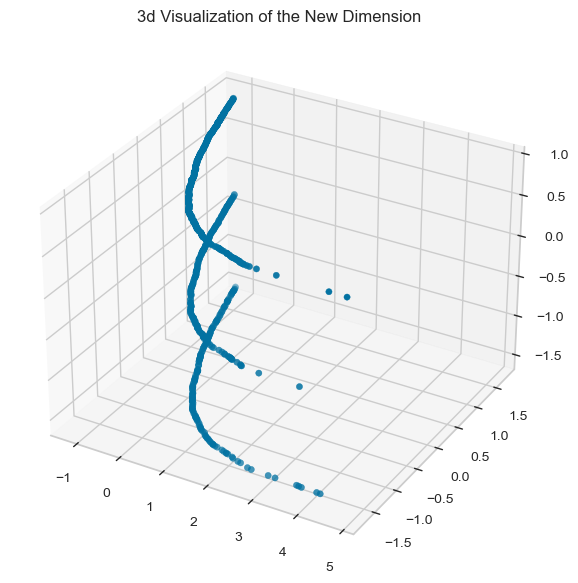

In [149]:
# visualise the new data dimensions
x = df5["TotalSales"]
y = df5["Rank"]
z = df5["wealth_segment"]

fig = plt.figure(figsize=(10,7))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("3d Visualization of the New Dimension");

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

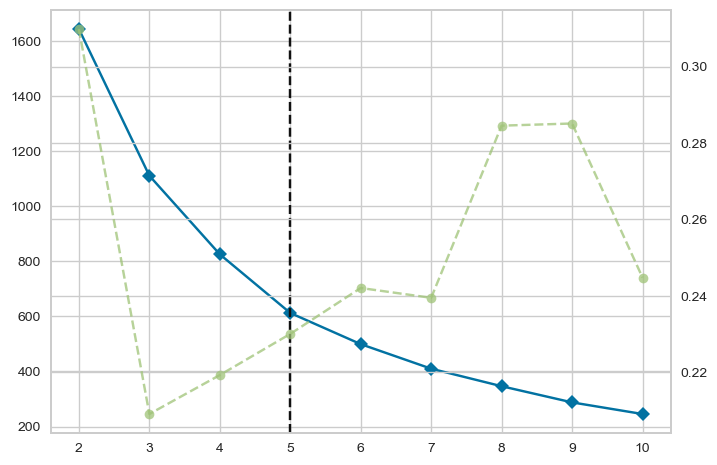

In [150]:
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(df5)

In [151]:
kmeans = KMeans(n_clusters=5,random_state=42)
y_means= kmeans.fit_predict(df5)
df5["clusters"] = y_means
model_df["clusters"] = y_means

In [152]:
df5.head()

,TotalSales,Rank,wealth_segment,clusters
0,4.795369,-1.730320,0.905637,3
1,4.414826,-1.726856,0.905637,3
2,4.258514,-1.723391,-1.512619,3
3,4.177235,-1.719927,-1.512619,3
4,3.840188,-1.716463,-1.512619,3


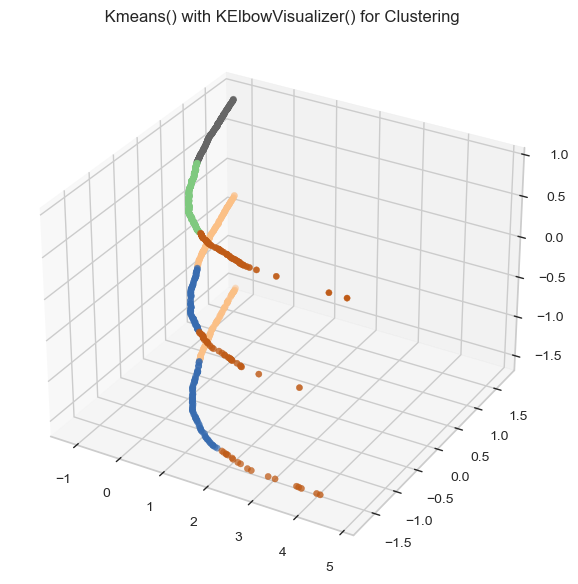

In [153]:
# plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df5["clusters"],marker="o", cmap=cmap)
ax.set_title(" Kmeans() with KElbowVisualizer() for Clustering");

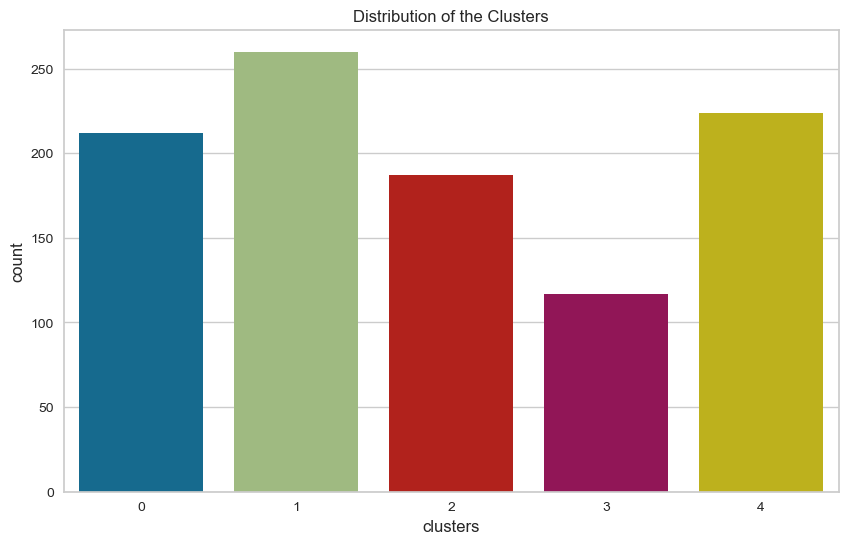

In [154]:
# plot the clusters on a ber viuslization
plt.figure(figsize=(10,6))
sns.countplot(x = df5.clusters)
plt.title("Distribution of the Clusters");

## Recommendation
- Target Segments: Given the customer demographics, prioritize digital marketing channels to reach the younger audience effectively. 

- Specific Recommendations: Tailor product/service offerings for each industry sector (financial, manufacturing, health, retail). 

- Strategies: Focus on localized marketing efforts in New South Wales to maximize impact and engagement.
